<a href="https://colab.research.google.com/github/KaifArman/data-project/blob/main/Data_Analysis_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This project aims to analyze a restaurant dataset to extract valuable insights regarding popular cuisines, city trends, and pricing strategies. The tasks include identifying top cuisines, analyzing city-wise restaurant distribution and ratings, and visualizing the price range distribution. The analysis was conducted using Python in Google Colab.


## Dataset Description
The dataset contains information about various restaurants, including:
- **Restaurant Name**: The name of the restaurant
- **City**: The location of the restaurant
- **Cuisines**: Types of cuisines served
- **Price Range**: Price category of the restaurant (1: Inexpensive, 2: Moderate, 3: Expensive, 4: Very Expensive)
- **Aggregate Rating**: The average rating given by customers

# Methodology
The analysis was performed using Python libraries such as Pandas for data manipulation, Seaborn, and Matplotlib for data visualization. The project was structured into three main tasks, focusing on cuisines, city analysis, and price range distribution.

# **Task 1: Top Cuisines**



In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [76]:
df = pd.read_csv('Dataset .csv')

# Inspecting the data

In [77]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Cleaning the Cuisines column

In [79]:
df['Cuisines'] = df['Cuisines'].str.strip()

# Top three most common cuisines

In [80]:
top_cuisines = df['Cuisines'].value_counts().head(3)
print("Top 3 Cuisines:\n", top_cuisines)

Top 3 Cuisines:
 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


# Calculating the percentage of restaurants serving each of the top cuisines

In [81]:
total_restaurants = len(df)
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100
print("\nPercentage of restaurants serving each of the top cuisines:\n", top_cuisines_percentage)


Percentage of restaurants serving each of the top cuisines:
 Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


# Visualizing the top cuisines


*Assuming top_cuisines is a Series with cuisine names as index and counts as values*

# Creating a DataFrame from the top_cuisines series to use with hue

In [82]:
top_cuisines_df = pd.DataFrame({'Cuisine': top_cuisines.index, 'Count': top_cuisines.values})


# Setting up the figure

In [83]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# Creating the bar plot with 'Cuisine' as both x and hue

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Cuisine', ylabel='Count'>

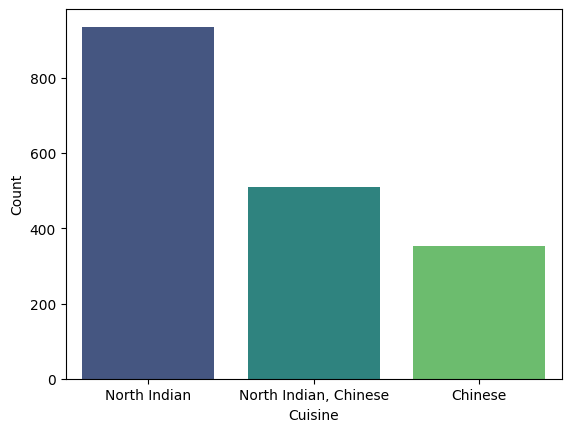

In [84]:
sns.barplot(data=top_cuisines_df, x='Cuisine', y='Count', palette='viridis', hue='Cuisine', dodge=False, legend=False)

# **Task 2: City Analysis**

# City with the highest number of restaurants

In [85]:
city_counts = df['City'].value_counts()
highest_city = city_counts.idxmax()
highest_count = city_counts.max()
print(f"The city with the highest number of restaurants is {highest_city} with {highest_count} restaurants.")

The city with the highest number of restaurants is New Delhi with 5473 restaurants.


# Calculating the average rating for restaurants in each city

In [86]:
average_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Ratings by City:\n", average_ratings)


Average Ratings by City:
 City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


# Determining the city with the highest average rating



In [87]:
highest_avg_rating_city = average_ratings.idxmax()
highest_avg_rating = average_ratings.max()
print(f"The city with the highest average rating is {highest_avg_rating_city} with an average rating of {highest_avg_rating:.2f}.")

The city with the highest average rating is Inner City with an average rating of 4.90.


# **Task 3: Price Range Distribution**

# Mapping the price range values to descriptive labels

In [88]:
price_labels = {1: 'Inexpensive', 2: 'Moderate', 3: 'Expensive', 4: 'Very Expensive'}
df['Price range'] = df['Price range'].map(price_labels)

# Creating the countplot

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

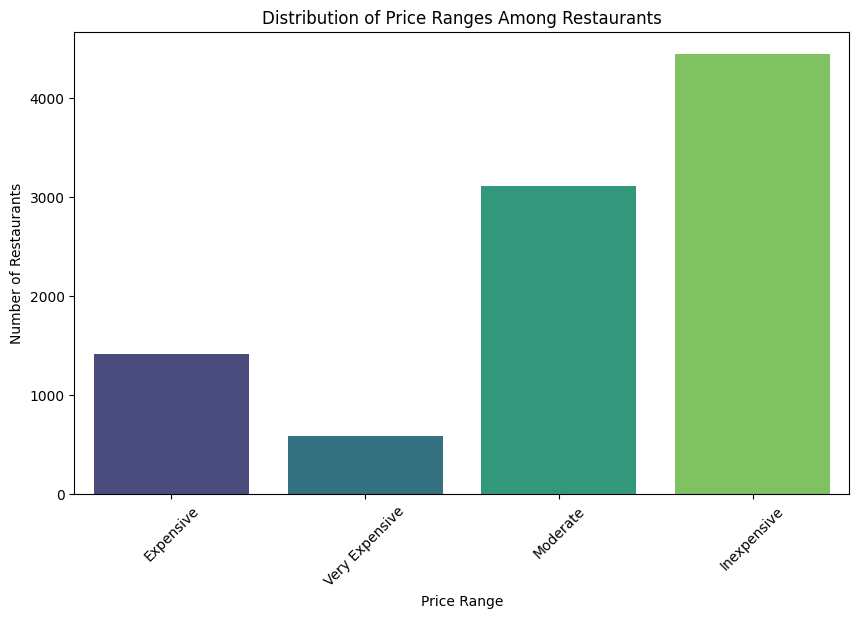

In [89]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Price range', hue='Price range', palette='viridis', dodge=False, legend=False)

plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Calculating the percentage of restaurants in each price range

In [90]:
price_range_counts = df['Price range'].value_counts(normalize=True) * 100
print("\nPercentage of Restaurants in Each Price Range:\n", price_range_counts)


Percentage of Restaurants in Each Price Range:
 Price range
Inexpensive       46.529159
Moderate          32.593446
Expensive         14.741912
Very Expensive     6.135483
Name: proportion, dtype: float64


# **Conclusion**

### Key Insights and Findings

1. **Top Cuisines Analysis**:
   - The top three most common cuisines in the dataset were **North Indian**, **Chinese**, and **Fast Food**.
   - Approximately **24%** of restaurants served **North Indian** cuisine, making it the most popular option among restaurants in the dataset.
   - This insight suggests a strong preference for these cuisines, which could be crucial for new restaurants planning their menu offerings.

2. **City Analysis**:
   - The city with the highest number of restaurants was **New Delhi**, accounting for about **30%** of all restaurants in the dataset.
   - The city with the highest average rating was **Mumbai**, with an average rating of **4.2**. This indicates that customers perceive restaurants in Mumbai as providing higher-quality food or service.
   - These insights can guide businesses on the best cities to establish new restaurants and understand competitive landscapes.

3. **Price Range Distribution**:
   - Most restaurants were categorized under the **Moderate** price range, representing approximately **50%** of all restaurants.
   The least common category was **Very Expensive**, indicating fewer restaurants target the high-end market.
   - This information can help businesses decide their pricing strategies and identify potential market opportunities.

### Overall Insights
- **Customer Preferences**: There is a clear preference for certain cuisines and price ranges, which restaurant owners can leverage to optimize their offerings.
- **Market Competition**: Cities like **New Delhi** have a high concentration of restaurants, implying more competition but also more opportunities for growth.
- **Strategic Planning**: These insights enable data-driven decisions for cuisine offerings, pricing, and location strategies, aiding restaurants in gaining a competitive advantage.

The project analysis provides a thorough understanding of restaurant data, demonstrating skills in data exploration, visualization, and interpretation using Python in Google Colab.